In [3]:
# Cargar el csv
import pandas as pd

In [5]:
# Cargar el csv
titanic_data = pd.read_csv("Titanic-Dataset.csv")

In [9]:
# Resumen general
print("Shape del dataset:", titanic_data.shape)
print("\nValores faltantes por columna:\n", titanic_data.isnull().sum())
print("\nDescripción general del dataset:\n", titanic_data.describe(include="all"))

Shape del dataset: (891, 12)

Valores faltantes por columna:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Descripción general del dataset:
         PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.0

In [11]:
# Vista inicial
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


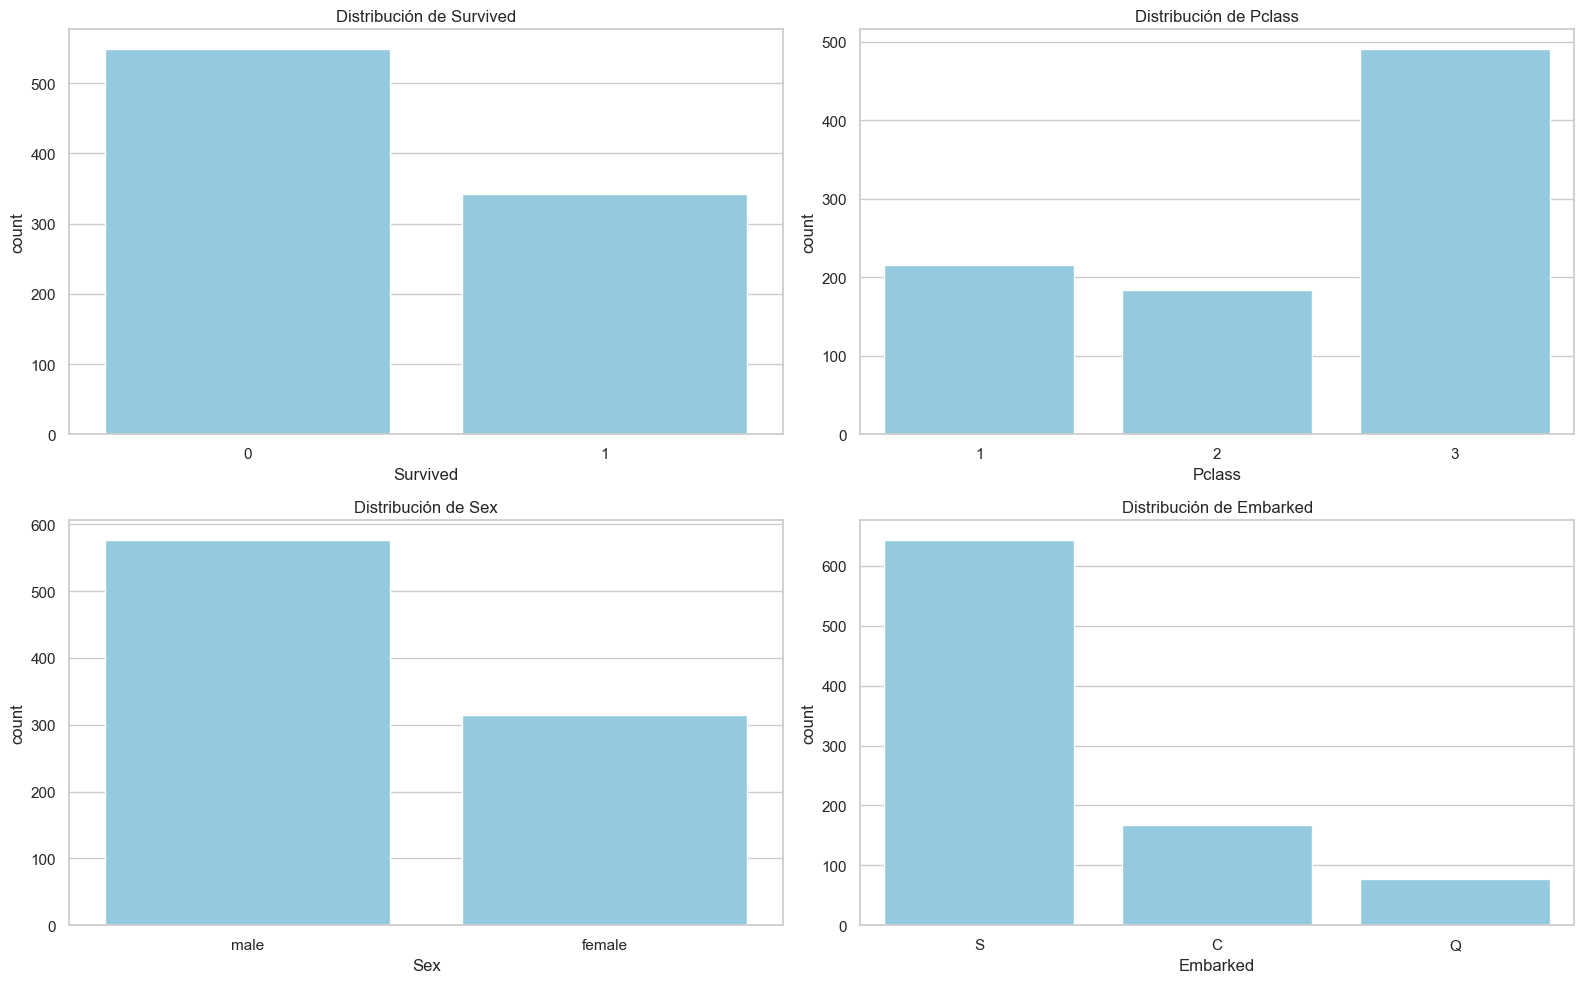

In [19]:
# Configurar el estilo de las gráficas
sns.set(style="whitegrid")

# Variables categóricas
categorical_cols = ['Survived', 'Pclass', 'Sex', 'Embarked']

# Graficar las distribuciones categóricas
plt.figure(figsize=(16, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=titanic_data, x=col, color="skyblue")  
    plt.title(f"Distribución de {col}")
plt.tight_layout()
plt.show()

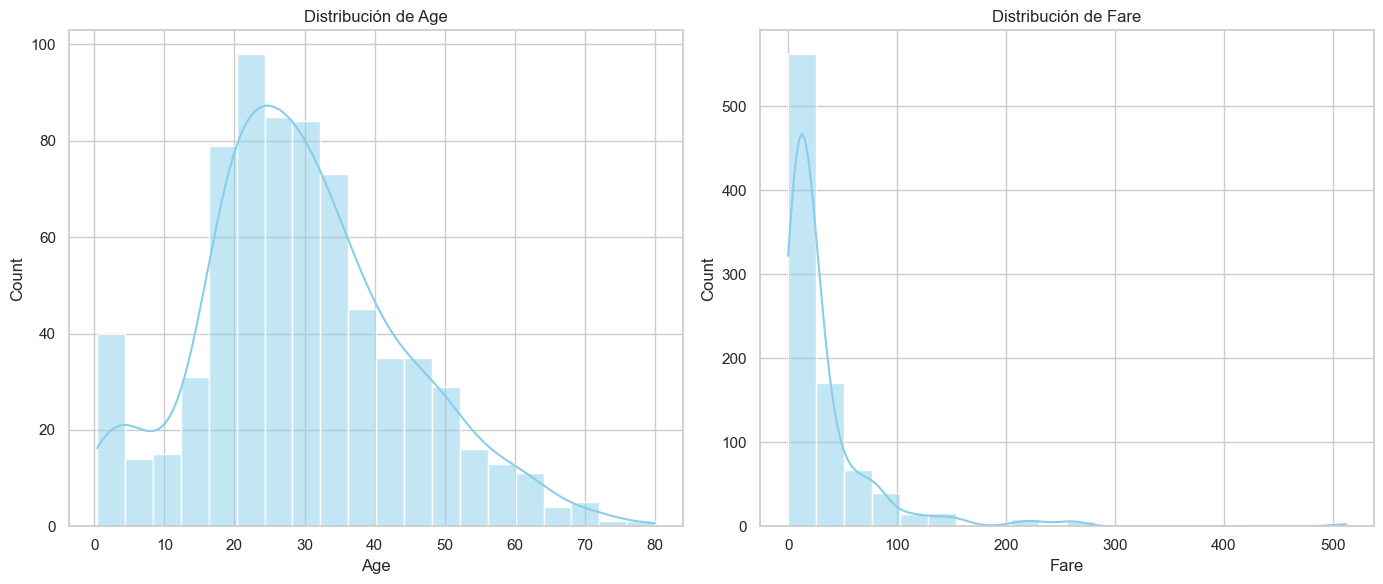

In [21]:
# Configurar el estilo de las gráficas
sns.set(style="whitegrid")

# Variables numéricas
numerical_cols = ['Age', 'Fare']

# Graficar las distribuciones numéricas
plt.figure(figsize=(14, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 2, i)
    sns.histplot(titanic_data[col], kde=True, bins=20, color="skyblue") 
    plt.title(f"Distribución de {col}")
plt.tight_layout()
plt.show()

Valores faltantes por columna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


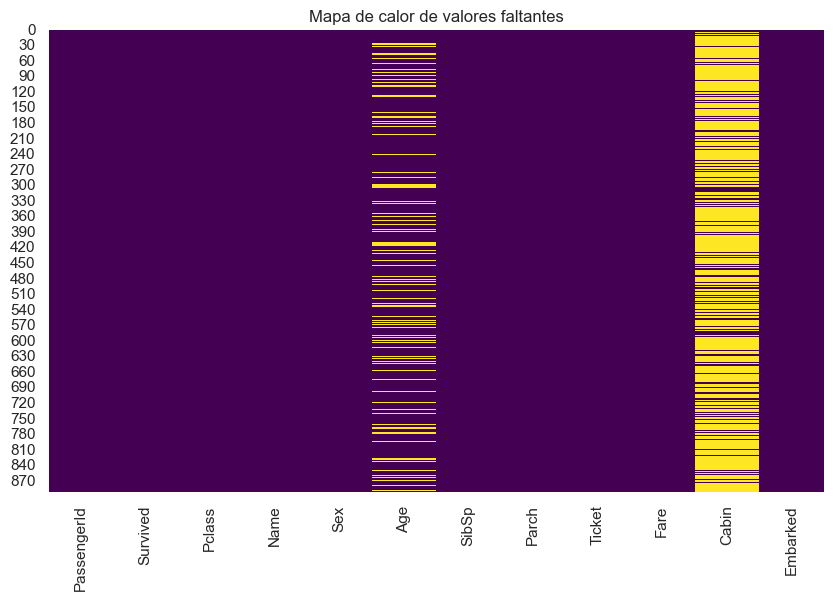

In [23]:
# Verificar valores faltantes en el dataset
missing_values = titanic_data.isnull().sum()

# Mostrar valores faltantes en pantalla
print("Valores faltantes por columna:")
print(missing_values)

# Visualización de valores faltantes
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(titanic_data.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de calor de valores faltantes")
plt.show()

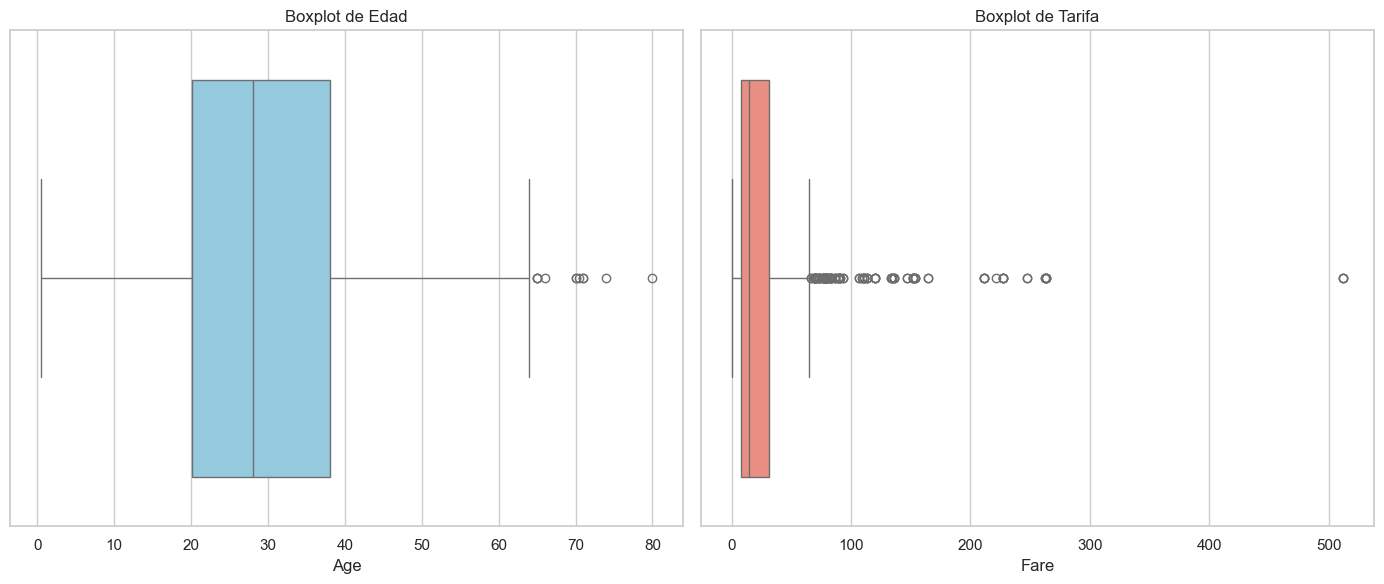

In [25]:
# Boxplots para valores atípicos en Edad y Tarifa
plt.figure(figsize=(14, 6))

# Edad
plt.subplot(1, 2, 1)
sns.boxplot(x=titanic_data["Age"], color="skyblue")
plt.title("Boxplot de Edad")

# Tarifa
plt.subplot(1, 2, 2)
sns.boxplot(x=titanic_data["Fare"], color="salmon")
plt.title("Boxplot de Tarifa")

plt.tight_layout()
plt.show()

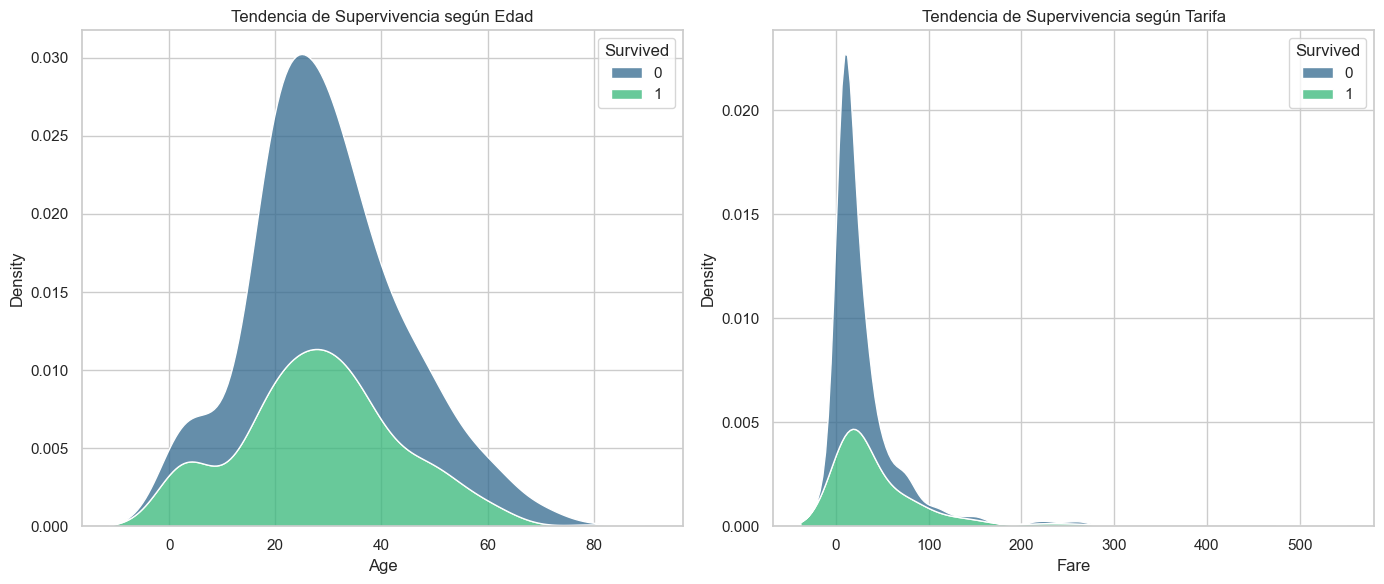

In [27]:
# Tendencias de supervivencia según Edad y Tarifa
plt.figure(figsize=(14, 6))

# Supervivencia según Edad
plt.subplot(1, 2, 1)
sns.kdeplot(data=titanic_data, x="Age", hue="Survived", multiple="stack", palette="viridis")
plt.title("Tendencia de Supervivencia según Edad")

# Supervivencia según Tarifa
plt.subplot(1, 2, 2)
sns.kdeplot(data=titanic_data, x="Fare", hue="Survived", multiple="stack", palette="viridis")
plt.title("Tendencia de Supervivencia según Tarifa")

plt.tight_layout()
plt.show()

In [ ]:
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [47]:
from sklearn.preprocessing import StandardScaler

# Escalar las variables numéricas
scaler = StandardScaler()
titanic_data[['Age', 'Fare']] = scaler.fit_transform(titanic_data[['Age', 'Fare']])

# Mostrar las primeras filas después del escalado
print("\nPrimeras filas del dataset después del escalado:")
print(titanic_data[['Age', 'Fare']].head())



Primeras filas del dataset después del escalado:
        Age      Fare
0 -0.565736 -0.502445
1  0.663861  0.786845
2 -0.258337 -0.488854
3  0.433312  0.420730
4  0.433312 -0.486337


In [49]:
# Selección de características (features) y variable objetivo (target)
X = titanic_data.drop(columns=['Survived'])  # Características (todas menos 'Survived')
y = titanic_data['Survived']  # Variable objetivo (Survived)

# Mostrar las primeras filas de las características y el target
print("\nPrimeras filas de las características y el target:")
print(X.head())
print("\nVariable objetivo (y):")
print(y.head())



Primeras filas de las características y el target:
   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

   Sex       Age  SibSp  Parch            Ticket      Fare Cabin  Embarked_Q  \
0  NaN -0.565736      1      0         A/5 21171 -0.502445   NaN       False   
1  NaN  0.663861      1      0          PC 17599  0.786845   C85       False   
2  NaN -0.258337      0      0  STON/O2. 3101282 -0.488854   NaN       False   
3  NaN  0.433312      1      0            113803  0.420730  C123       False   
4  NaN  0.433312      0      0            373450 -0.486337   NaN       False   

   E

In [ ]:
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

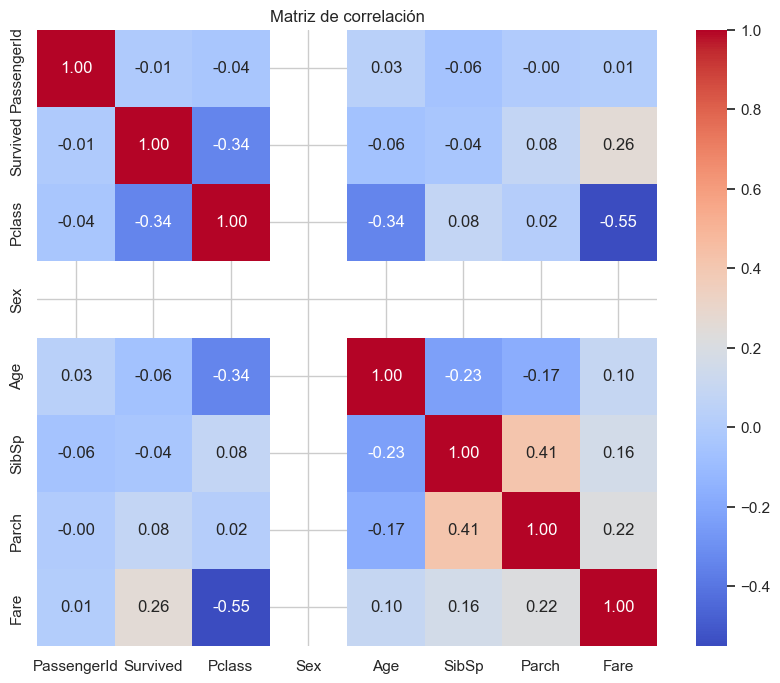


Primeras filas del dataset después de eliminar columnas correlacionadas:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex       Age  SibSp  \
0                            Braund, Mr. Owen Harris  NaN -0.565736      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  NaN  0.663861      1   
2                             Heikkinen, Miss. Laina  NaN -0.258337      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  NaN  0.433312      1   
4                           Allen, Mr. William Henry  NaN  0.433312      0   

   Parch            Ticket      Fare Cabin  Embarked_Q  Embarked_S  
0      0         A/5 21171 -0.502445   NaN       False        True  
1      0          PC 17599  0.786845   C85       False       False  
2      0  STON/O2. 3101282 -0.488

In [57]:
# Seleccionar solo las columnas numéricas para calcular la correlación
numeric_columns = titanic_data.select_dtypes(include=['float64', 'int64']).columns

# Calcular la matriz de correlación solo con columnas numéricas
correlation_matrix = titanic_data[numeric_columns].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de correlación")
plt.show()

# Eliminar características que están altamente correlacionadas (por ejemplo, con un umbral de 0.9)
threshold = 0.9
columns_to_drop = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            columns_to_drop.add(colname)

# Eliminar las columnas seleccionadas
titanic_data = titanic_data.drop(columns=columns_to_drop)

# Mostrar las primeras filas después de eliminar columnas
print("\nPrimeras filas del dataset después de eliminar columnas correlacionadas:")
print(titanic_data.head())


In [ ]:
4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [79]:
# Dividir el dataset en características (X) y variable objetivo (y)
X = titanic_data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']]  # Características seleccionadas
y = titanic_data['Survived']  # Variable objetivo

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos de datos
print("Tamaño del conjunto de entrenamiento X_train:", X_train.shape)
print("Tamaño del conjunto de prueba X_test:", X_test.shape)


Tamaño del conjunto de entrenamiento X_train: (712, 7)
Tamaño del conjunto de prueba X_test: (179, 7)


In [ ]:
5. Entrenar el modelo configurando los diferentes hiperparámetros

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  

# Crear el modelo de regresión logística
log_reg = LogisticRegression(solver='liblinear', penalty='l1', random_state=42)  # Usando L1 (Lasso) y solver 'liblinear'

# Entrenar el modelo con los datos de entrenamiento
log_reg.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = log_reg.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Imprimir los resultados
print("Precisión del modelo: ", accuracy)
print("Matriz de confusión:")
print(conf_matrix)
print("Informe de clasificación:")
print(class_report)


Precisión del modelo:  0.7932960893854749
Matriz de confusión:
[[89 16]
 [21 53]]
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [ ]:
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [85]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluar el desempeño del modelo en el conjunto de prueba
y_pred = log_reg.predict(X_test)

# Calcular precisión, recall, f1-score y matriz de confusión
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Mostrar los resultados
print("Precisión del modelo (Accuracy): ", accuracy)
print("Matriz de confusión:")
print(conf_matrix)
print("Informe de clasificación:")
print(class_report)


Precisión del modelo (Accuracy):  0.7932960893854749
Matriz de confusión:
[[89 16]
 [21 53]]
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [ ]:
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

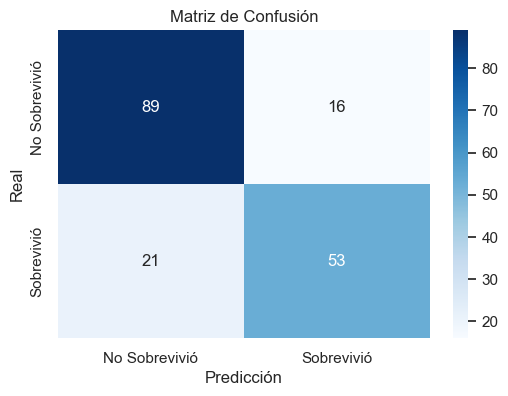

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Sobrevivió', 'Sobrevivió'], yticklabels=['No Sobrevivió', 'Sobrevivió'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


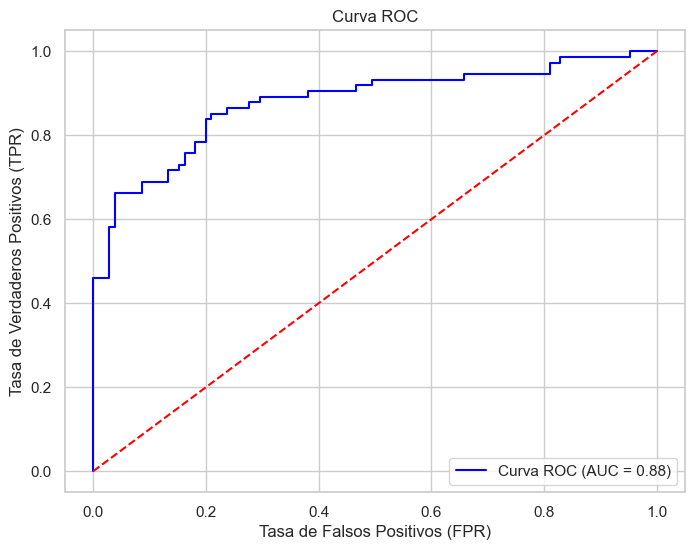

In [89]:
from sklearn.metrics import roc_curve, roc_auc_score

# Obtener las probabilidades de predicción
y_prob = log_reg.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='Curva ROC (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Curva ROC')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc='lower right')
plt.show()


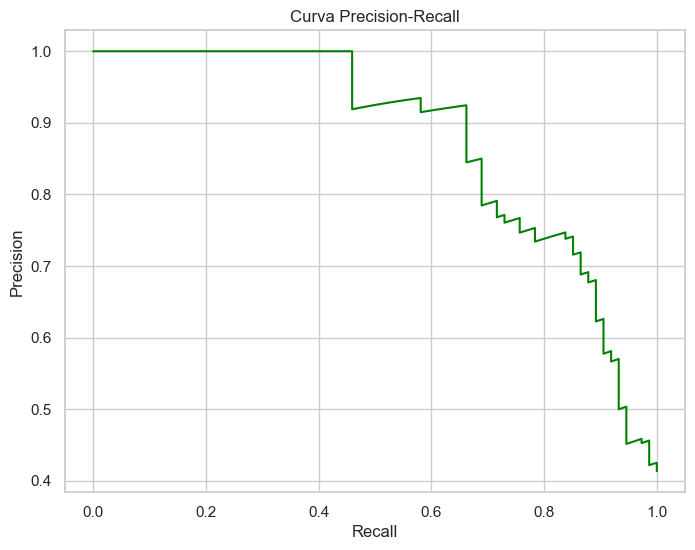

In [91]:
from sklearn.metrics import precision_recall_curve

# Calcular la curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Graficar la curva Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green')
plt.title('Curva Precision-Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()
